In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import copy


In [131]:
df = pd.read_csv('4.dat', sep='\t')
for i in [5, 6]:
    df_1 = pd.read_csv(f'{i}.dat', sep='\t')
    if i == 5:
        df_1 = df_1.rename(columns={'Ou2': 'Out2'})
    df = pd.concat([df, df_1], axis=0)
df.to_csv('data.csv', index=False)

In [46]:
df = pd.read_csv('data.csv')
df

,Tsys,Out1,Out2,In1,In2,In3,In4,In5,In6
0,2364.84277,-4.34136,1.68399,-90.0,5090.58363,4.58471,3.712770e-04,0.001130,0.001320
1,5964.81425,-4.52228,1.68411,-90.0,5092.08024,8.17615,4.056300e-04,0.001030,0.000363
2,9564.73390,-4.63998,1.68448,-90.0,5093.44904,11.31503,3.668970e-04,0.000736,0.001570
3,13164.79893,-5.18301,1.68480,-90.0,5094.70046,14.23037,3.763350e-04,-0.000070,0.000083
4,16764.57814,-4.87620,1.68521,-90.0,5095.90643,17.08063,3.057320e-04,0.000344,0.000720
...,...,...,...,...,...,...,...,...,...
3608,63504.46044,0.40289,1.67702,90.0,5064.74316,25.81673,2.919140e-14,0.000012,-0.000641
3609,67104.39373,0.40437,1.67702,90.0,5064.74707,25.81759,9.925390e-14,-0.000213,0.000730
3610,77904.21491,0.40763,1.67702,90.0,5064.74805,25.81840,1.102450e-13,0.001060,-0.000281
3611,74304.28061,0.38628,1.67702,90.0,5064.74951,25.82942,3.161360e-14,-0.000406,-0.000055


In [2]:
df = pd.read_csv('5.dat', sep='\t')
df

,Tsys,Out1,Ou2,In1,In2,In3,In4,In5,In6
0,2362.42077,7.66364,1.68724,-90.0,5099.35795,4.46604,0.000356,0.001120,0.001120
1,5962.07691,8.39095,1.68731,-90.0,5100.97968,8.07564,0.000427,0.000405,0.000405
2,9561.85409,8.67365,1.68735,-90.0,5102.47173,11.21727,0.000404,-0.000035,-0.000035
3,13161.83265,8.46233,1.68744,-90.0,5103.83133,14.14074,0.000367,0.000555,0.000555
4,16761.45287,9.25582,1.68747,-90.0,5105.14095,17.00533,0.000353,0.001050,0.001050
...,...,...,...,...,...,...,...,...,...
1001,34760.94292,8.52628,1.68773,90.0,5111.62272,31.27375,0.000382,0.000542,0.000542
1002,38360.94078,8.05349,1.68784,90.0,5112.89864,34.08435,0.000358,0.000747,0.000747
1003,41960.78591,7.93733,1.68788,90.0,5114.16861,36.90738,0.000349,0.000990,0.000990
1004,45560.60909,7.94716,1.68786,90.0,5115.43246,39.71580,0.000342,0.001210,0.001210


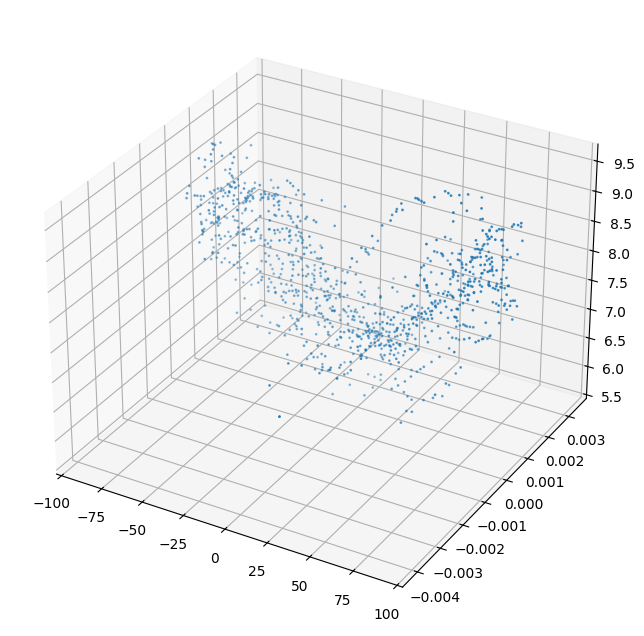

In [3]:
X, Y = np.meshgrid(df['In1'].iloc[:1000], df['In2'].iloc[:1000])


fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['In1'], df['In6'], df['Out1'], s=1)

plt.show()

# Полносвязная нейронная сеть

In [6]:
X = df[['In1', 'In2']].values
y = df['Out1'].values
y = y.reshape(-1, 1)



class min_max_scaller(): # Класс МинМакс нормировки
    
    def __init__(self): # Инициализация 
        pass

    def fit(self, X): # Обучение 
        self.param = X.min(axis=0), X.max(axis=0) # Сохраняем параметры мин и макс
        
    def transform(self, X): # Нормировка по уже существующим параметрам
        return (X - self.param[0]) / (self.param[1] - self.param[0]) # Номрмировка
    
    def revers_transform(self, X):
        return X * (self.param[1] - self.param[0]) + self.param[0]

minMaxScaller = min_max_scaller()
minMaxScaller.fit(X)
X_norm = minMaxScaller.transform(X)
X_norm




array([[0.        , 0.01936935],
       [0.        , 0.10865578],
       [0.        , 0.19080252],
       ...,
       [1.        , 0.8347893 ],
       [1.        , 0.90437218],
       [1.        , 0.97309344]], shape=(1006, 2))

In [7]:
       
        
class Layer(): # Класс слоя нейронной сети
    
    def __init__(self, count_of_feature, count_of_neuron = 5, func='sigmoid'): 
        self.W = np.random.random(size=(count_of_neuron, count_of_feature+1)) # Генерация случайной матрицы весов на слое с учетом смещения
        self.func = func # Присвоение ф-ии активации
        
    def activate(self, INPUT): # Подача матрицы INPUT строго размерности (кол-во наблюдений, кол-во признаков) 
        self.INPUT_dervative = INPUT # Входные данные без смещения
        self.INPUT = np.hstack((np.ones((INPUT.shape[0], 1)), INPUT)) # К входной матрице добавляем константу сдвига = 1
        self.LIANER_TRANSFORM = np.array(self.INPUT @ self.W.T) # Матрица линейно-преобразованного входа
        
        def sigmoid(x): # ф-ия активации сигмоида
            return 1/(1+np.exp(-x))
        
        def sigmoid_derevative(x): # производная сигмоиды
            return x * (1-x)
        
        def tanh(x): # Ф-ия активации тангенса
            return np.tanh(x)

        def tanh_derivative(x): # Производная тангенса
            return 1 - np.tanh(x)**2
        
        def relu(x): # Ф-ия активации ReLU
            return np.maximum(0, x)

        def relu_derivative(x): # Производная ReLU
            return np.where(x > 0, 1, 0)
        
        if self.func == 'sigmoid':
            self.OUTPUT = sigmoid(self.LIANER_TRANSFORM) # Применение ф-ии активации сигмоиды
            self.OUTPUT_derevative = sigmoid_derevative(self.LIANER_TRANSFORM) # Производная сигмоиды
        
        if self.func == 'tanh':
            self.OUTPUT = tanh(self.LIANER_TRANSFORM) # Применение ф-ии активации сигмоиды
            self.OUTPUT_derevative = tanh_derivative(self.LIANER_TRANSFORM) # Производная сигмоиды
        
        if self.func == 'ReLU':
            self.OUTPUT = relu(self.LIANER_TRANSFORM) # Применение ф-ии активации сигмоиды
            self.OUTPUT_derevative = relu_derivative(self.LIANER_TRANSFORM) # Производная сигмоиды
        
        if self.func == 'lianer':
            self.OUTPUT = self.LIANER_TRANSFORM
            self.OUTPUT_derevative = 1 # Сделано для того, чтобы при расчете сложной производной в обратном порядке не дублировались значения, так они проходятся по списку
    
class Optimizer(): # Класс оптимизаторов
    
    def __init__(self, method = 'sgd', alpha=0.9, beta=0.99): # Инициализация объекта класса с заданным видом оптимизатора
        self.method = method
        self.alpha= alpha
        self.beta = beta
        
    def start(self, W, learning_rate, grW): # Инициализация процесса оптимизации для оптимизаторов, с накоплениями
        
        if self.method == 'sgd': 
            return W - learning_rate * grW
        
        elif self.method == 'momentum': # Инициалазиация метода моментов
            self.velocity = grW # Создание памяти
            return W - learning_rate * grW
        
        elif self.method == 'RMSProp': # Инициализация метода Адаптивного градиентного спуска
            self.square_of_grW = grW**2
            self.velocity = (1-self.beta) * self.square_of_grW
            return W - learning_rate * grW / (self.velocity + 10**(-8))**0.5
        
        elif self.method == 'AdaGrad':
            self.square_of_grW = grW**2
            self.velocity = self.square_of_grW
            return W - learning_rate * grW / (self.velocity + 10**(-8))**0.5
        
        elif self.method == 'Adam':
            self.square_of_grW = grW**2
            self.momentum = (1 - self.beta) * self.square_of_grW
            self.velocity = (1-self.alpha) * grW
            m = self.momentum / (1-self.beta)
            v = self.velocity / (1-self.alpha)
            return W - learning_rate * v / (m + 10**(-8))**0.5
            
    def optimize(self, W, learning_rate, grW): # Процесс оптимизации
        
        if self.method == 'sgd':
            return W - learning_rate * grW
        
        elif self.method == 'momentum':
            self.velocity = self.alpha * self.velocity + (1 - self.alpha) * grW # Обновление памяти с коэф. Экс. Сглаживания
            return W - learning_rate * self.velocity
        
        elif self.method == 'RMSProp':
            self.square_of_grW = grW**2
            self.velocity = self.beta * self.velocity  + (1 - self.beta) * self.square_of_grW
            return W - learning_rate * grW / (self.velocity + 10**(-8))**0.5
        
        elif self.method == 'AdaGrad':
            self.square_of_grW = grW**2
            self.velocity = self.velocity  + self.square_of_grW
            return W - learning_rate * grW / (self.velocity + 10**(-8))**0.5
        
        elif self.method == 'Adam':
            self.square_of_grW = grW**2
            self.momentum = self.beta * self.momentum + (1 - self.beta) * self.square_of_grW
            self.velocity = self.alpha * self.velocity + (1 - self.alpha) * grW # Обновление памяти с коэф. Экс. Сглаживания
            m = self.momentum / (1-self.beta)
            v = self.velocity / (1-self.alpha)
            return W - learning_rate * v / (m + 10**(-8))**0.5
            
class NeuronNetwork():
    
    def __init__(self, layers=((5, 'sigmoid'),
                               (1, 'leaner')),
                 loss_func='mse'):
        
        '''
        layers - список с кол-вом нейронов на каждом слое
        '''
        
        self.func_of_loss = loss_func
        self.layers = layers 
        self._memory_Grad = 0
        
    def _loss_func(self, y, y_pred): # Ф-ия определения ошибки и производной функционала ошибок

        def mse(y, y_pred):
            return ((y - y_pred).T @ (y - y_pred))/y.shape[0]
        
        def mse_derevative(y):
            return -2/self.size_batch * (y - y_pred) # Считаем градиент MSE по выходу последнего слоя
        
        def logloss(y, y_pred):
            return (-y.T @ np.log(y_pred) - (1-y).T @ np.log(1-y_pred))/y.shape[0]

        def logloss_derevative(y):
            return (-y/self.lst_of_layers[-1].OUTPUT) + ((1-y)/(1-y_pred))
        
        if self.func_of_loss == 'mse':
            self.loss_func = mse(y, y_pred)
            self.loss_derevative = mse_derevative(y)
            
        elif self.func_of_loss == 'logloss':
            self.loss_func = logloss(y, y_pred)
            self.loss_derevative = logloss_derevative(y)


    def _initial_activate_network(self, X): # Ф-ия активации нейронки
        layer = Layer(count_of_feature=X.shape[1], count_of_neuron=self.layers[0][0], func=self.layers[0][1]) # Инициализация нейронной сети, создание первого слоя    
        
        layer.activate(X) # Активация 1-го слоя
        lst_of_layers = [] # Создаем список, где буду храниться объекты слоев
        lst_of_layers.append(layer) # Добавляем объект ранее созданного слоя в список слоев
        
        for i in self.layers[1:]:
            layer = Layer(count_of_feature=lst_of_layers[-1].OUTPUT.shape[1], count_of_neuron=i[0], func=i[1]) # Инициализация нового слоя по списку
            layer.activate(lst_of_layers[-1].OUTPUT) # Активируем слой по матрице выходных данных из предыдущего слоя
            lst_of_layers.append(layer) # Добавляем объект ранее созданного слоя в список слоев
        
        self.lst_of_layers = lst_of_layers
    
    def _activate_network(self, X): # Ф-ия активации нейронки с уже инициализированными нейронами
        self.lst_of_layers[0].activate(X) # В первый слой подаем признаки батча
        for i in range(1, len(self.layers)): # прогоняем нейронку по батчу
            self.lst_of_layers[i].activate(self.lst_of_layers[i-1].OUTPUT) # Активируем слой по матрице выходных данных из предыдущего слоя
    
    # Ф-ия обучения
    def fit(self, X, Y, size_batch=500, count_epoch = 5, learning_rate = 10**(-2), eps=10**(-12), count_of_iteration = 10000, optimizer='sgd', alpha=0.1):
        
        self.count_epoch = count_epoch
        self.size_batch = size_batch # Размер батча
        self.learning_rate = learning_rate # Скорость обучения
        self.eps = eps # Точность обучения
        self.optimizer = optimizer
        self.alpha = alpha
        self.count_of_iteration = count_of_iteration
        
        # Блок инициализации сети
        
        self.dct_of_result = {} # Словарь для сохранения результатов эпох
        for epoch in range(self.count_epoch):
            
            self._initial_activate_network(X) # Инициализация сети
            
            # Блок обучения сети
            
            self._loss_func(Y, self.lst_of_layers[-1].OUTPUT)
            
            print(self.loss_func) # Отчет о начальном MSE
            
            # Блок обучение для батча
            
            
            
            dct_of_optimizer = {} # Создание словаря для сохранения объектов-оптимизаторов для каждого слоя
            count = 0 # Счетчик для инициализации объектов-оптимизаторов
            while True:
                
                ind = np.random.choice(X.shape[0], size=self.size_batch, replace=False)
                # Y_X_batch = Y_X[ind] # Формируем батч из к наблюдений
                y_batch, X_batch = Y[ind], X[ind] # разбиваем батч результатов и признаков
                self.X_batch = X_batch
                self.y_batch = y_batch
                
                last_loss_func = self.loss_func
                
                # Прогоняем нейронку по батчам
                self._activate_network(X_batch)
                
                self._loss_func(y_batch, self.lst_of_layers[-1].OUTPUT) # Расчет ф-ии ошибок + производная
                
                print(self.loss_func) # Отчет о MSE на итерации
                
                self.lst_grad_x = [] # Создаем списки для хранения градиентов по X и по W
                self.lst_grad_x.append(self.loss_derevative) # Добавляю конечный градиент ошибки в списки
                
                for layer in self.lst_of_layers[::-1]:
                    
                    if count == 0: # Инициализация объектов-оптимизаторов
                        
                        gr_1 = layer.OUTPUT_derevative * self.lst_grad_x[-1] # Градиент по ф-ии активации
                        gr_w = (gr_1.T @ layer.INPUT) # Градиент MSE по весам 
                        
                        dct_of_optimizer[(layer)] = Optimizer(method=self.optimizer) # Создание объекта оптимизатора для отдельно взятого слоя
                        layer.W = dct_of_optimizer[layer].start(layer.W, self.learning_rate, gr_w / self.size_batch) # Приращение весов по оптимизатору
                        
                        
                        gr_2 = (layer.W.T @ gr_1.T)[1:].T # Градиент MSE по признакам
                        
                    else:
                        gr_1 = layer.OUTPUT_derevative * self.lst_grad_x[-1] # Градиент по ф-ии активации
                        gr_w = (gr_1.T @ layer.INPUT) # Градиент MSE по весам 
                        
                        layer.W = dct_of_optimizer[layer].optimize(layer.W, self.learning_rate, gr_w / self.size_batch) # Приращение весов по оптимизатору
                        
                        
                        gr_2 = (layer.W.T @ gr_1.T)[1:].T # Градиент MSE по признакам
                
                    self.lst_grad_x.append(gr_2)
                
                count += 1 # Увеличение счетчика, чтобы уйти с этапа инициализации
                
                if np.isnan(self.loss_func): # Иногда ф-ия ошибок уходит в NaN при больших скачках градиентов и уже не возвращается
                    self.loss_func = np.inf
                    break
                
                if (np.linalg.norm(self.loss_func - last_loss_func) <= self.eps) or count == self.count_of_iteration:
                    break
                
            self.dct_of_result[f'Эпоха {epoch}'] = copy.deepcopy(self) # Сохраняем каждую обученную модель в список
                
        self.dct_of_result = dict(sorted(self.dct_of_result.items(), key=lambda item: item[1].loss_func, reverse=False))    
        
        self = next(iter(self.dct_of_result.values())) # Не решено!!!! Объект не перезаписывается
        
            
    def return_result_epoch(self): # Ф-ия вывода результатов по эпохам
        for key, value in self.dct_of_result.items(): # Прогоняем словарь моделей
            print(f'{key}: {value.loss_func}') # Выводим результат по каждой
            
    # Ф-ия предсказания                
    def predict(self, X):
        self._activate_network(X) # Прогоняем нейронку по поданным данным
        return self.lst_of_layers[-1].OUTPUT
        
        
        

In [38]:
nn = NeuronNetwork(layers=((10, 'ReLU'),
                           (15, 'ReLU'),
                           (5, 'ReLU'),
                           (1, 'lianer')),
                   loss_func='mse')

nn.fit(X_norm, y, size_batch=10, learning_rate=10**(-4), eps=10**(-8), optimizer='Adam', alpha=0.9, count_epoch=5, count_of_iteration=25000)

[[10858.96361189]]
[[11602.28032919]]
[[12790.91407265]]
[[9271.62359517]]
[[12913.20136308]]
[[12247.57032959]]
[[11958.4891242]]
[[9964.04953292]]
[[12349.65302316]]
[[11179.05536242]]
[[9393.08878106]]
[[11624.20647876]]
[[11867.77425816]]
[[10235.31187538]]
[[14314.13687577]]
[[9251.41331608]]
[[8901.24031421]]
[[8753.14585419]]
[[12366.2479319]]
[[8749.7484458]]
[[9199.09197222]]
[[8721.09773451]]
[[11104.50066744]]
[[8536.97467215]]
[[10657.55095958]]
[[10324.25522603]]
[[8580.0194425]]
[[10107.12303024]]
[[12515.98110452]]
[[9681.6487415]]
[[11941.23320873]]
[[10376.44301003]]
[[8249.71859055]]
[[9431.547732]]
[[9266.13858009]]
[[8876.22596011]]
[[11320.12701496]]
[[10018.78096479]]
[[9286.54903376]]
[[9001.64030772]]
[[9167.10185083]]
[[10468.42247199]]
[[9436.82029512]]
[[12845.926614]]
[[8258.6869935]]
[[8177.16892028]]
[[9263.85671754]]
[[8731.64308899]]
[[9673.82338754]]
[[8843.01186652]]
[[9759.87646387]]
[[9467.63861584]]
[[8562.15705273]]
[[8051.31077941]]
[[9411.2583446

In [39]:
nn.return_result_epoch()

Эпоха 2: [[0.04680171]]
Эпоха 3: [[0.17073563]]
Эпоха 0: [[0.36468876]]
Эпоха 1: [[0.66340934]]
Эпоха 4: [[1.06143424]]


In [177]:
nn.loss_func

inf

In [66]:
nn.lst_of_layers[-1].W

array([[0.8324907 , 0.07565489, 0.62431608, 0.06468209, 0.73738365,
        0.73348864]])

In [68]:
nn.dct_of_optimizer[0][nn.lst_of_layers[-1]].optimize(nn.lst_of_layers[-1].W, 0.1, nn.lst_of_layers[-1].W)

In [24]:
nn.lst_of_layers[-1].W = 1

In [219]:
(nn.y_batch - nn.lst_of_layers[-1].OUTPUT) @ (nn.y_batch - nn.lst_of_layers[-1].OUTPUT)

array([[0.4048786 , 0.55353836, 0.08025424, ..., 0.37374521, 0.59154148,
        0.41315681],
       [0.55353836, 0.7567817 , 0.10972129, ..., 0.51097368, 0.80873848,
        0.56485609],
       [0.08025424, 0.10972129, 0.01590784, ..., 0.07408304, 0.11725419,
        0.08189513],
       ...,
       [0.37374521, 0.51097368, 0.07408304, ..., 0.34500584, 0.54605454,
        0.38138686],
       [0.59154148, 0.80873848, 0.11725419, ..., 0.54605454, 0.86426235,
        0.60363624],
       [0.41315681, 0.56485609, 0.08189513, ..., 0.38138686, 0.60363624,
        0.42160428]])

In [217]:
nn.lst_of_layers[-1].OUTPUT

array([[0.97144772],
       [0.97144897],
       [0.97144987],
       [0.97144784],
       [0.97144567],
       [0.97144888],
       [0.97144896],
       [0.97144946],
       [0.971449  ],
       [0.9714484 ],
       [0.97144913],
       [0.97144808],
       [0.97144618],
       [0.97144861],
       [0.97144967],
       [0.97144515],
       [0.97144617],
       [0.97144952],
       [0.97144775],
       [0.97144457],
       [0.97144902],
       [0.97144798],
       [0.97144578],
       [0.97144665],
       [0.97144709],
       [0.97144804],
       [0.97144672],
       [0.97144861],
       [0.97144874],
       [0.97144823],
       [0.97144991],
       [0.97144759],
       [0.97144745],
       [0.97144871],
       [0.97144617],
       [0.97144558],
       [0.97144791],
       [0.9714496 ],
       [0.97144546],
       [0.9714456 ],
       [0.97144829],
       [0.97144861],
       [0.97144507],
       [0.97144923],
       [0.97144799],
       [0.97144836],
       [0.97144965],
       [0.971

In [201]:
nn.y_batch.shape

(200, 1)

In [ ]:
gr_1 = nn.lst_of_layers[-1].OUTPUT_derevative *
nn.ls.gr_1 = gr_1
gr_w = gr_1.T @ nn.lst_of_layers[-1].INPUT  # Градиент MSE по весам
nn.lst_of_layers[-1].W = sgd(nn.lst_of_layers[-1].W, gr_w, nn.ls.learning_rate) # Приращение весов

gr_2 = (gr_1 @ nn.lst_of_layers[-1].W)[:,1:]  # Градиент MSE по признакам